# Project- Glass Identification Dataset

### Problem Statement:

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("glass.csv" ,names= ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type'])

In [3]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#### we can see all column are numerical in nature and our target column is in 1,2,3,.... so it is classification problem

#### Total number of rows 214 and columns is 11

In [4]:
df.tail()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


#### we can see Fe have 0.0 which will be treated afterwards

In [5]:
df.sample(5)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
60,61,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.0,0.00,1
122,123,1.51687,13.23,3.54,1.48,72.84,0.56,8.10,0.0,0.00,2
136,137,1.51806,13.00,3.80,1.08,73.07,0.56,8.38,0.0,0.12,2
14,15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.0,0.00,1
59,60,1.51754,13.39,3.66,1.19,72.79,0.57,8.27,0.0,0.11,1


In [6]:
# columns name

df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'glass_type'],
      dtype='object')

### Columns

#### Datset is divided into window glass (classes 1-4) and non window glass(glasses 5-7)

In [7]:
# Now lets identify which types of data types do they all belongs

df.dtypes

Id              int64
RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
glass_type      int64
dtype: object

In [8]:
# To get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  glass_type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


### lets check NaN value

In [9]:
df.isnull().sum()

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

#### we can see there is no NaN value in any columns

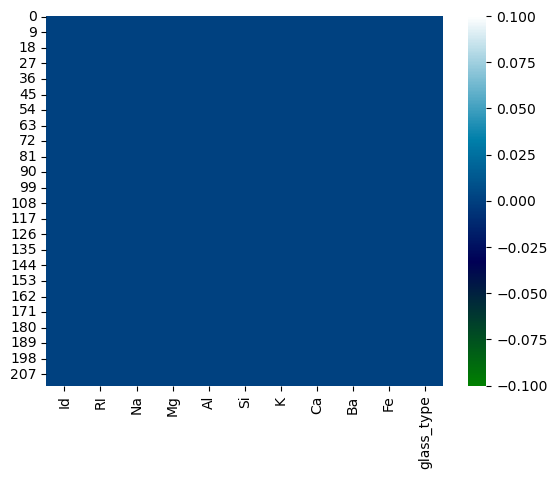

In [10]:
# Let's visualize NaN values
sns.heatmap(df.isnull(),cmap="ocean")
plt.show()

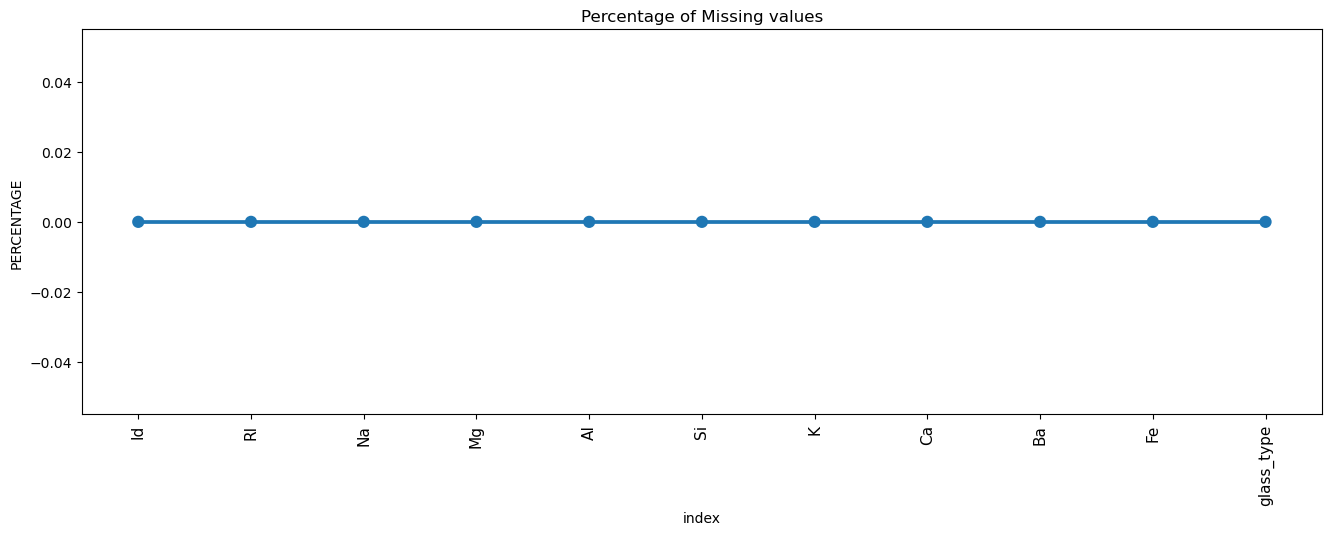

In [11]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =11)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

#### we can see through graph also that there is no nan value

In [12]:
# Value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('\n\n')
        print ('*'*100)

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id, Length: 214, dtype: int64



****************************************************************************************************
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64



****************************************************************************************************
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64



****************************************************************************************************
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64



**********************************************************

In [13]:
zerovalue=pd.DataFrame(df.isin([0]).sum().sort_values(ascending=False))
zerovalue.columns=["Count of Zero values"]
zerovalue['% of zero values']=zerovalue['Count of Zero values']/2.14    #214/100=2.14

zerovalue

,Count of Zero values,% of zero values
Ba,176,82.242991
Fe,144,67.289720
Mg,42,19.626168
K,30,14.018692
Id,0,0.000000
RI,0,0.000000
Na,0,0.000000
Al,0,0.000000
Si,0,0.000000
Ca,0,0.000000


#### So Ba is having 0.0 values above 82% and Fe is having 0.0 value above 67% and this two columns will not be contributing to my model accuracy.. so i will deleted this column lateer

### Lets Visualize

Value Count :-  2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64


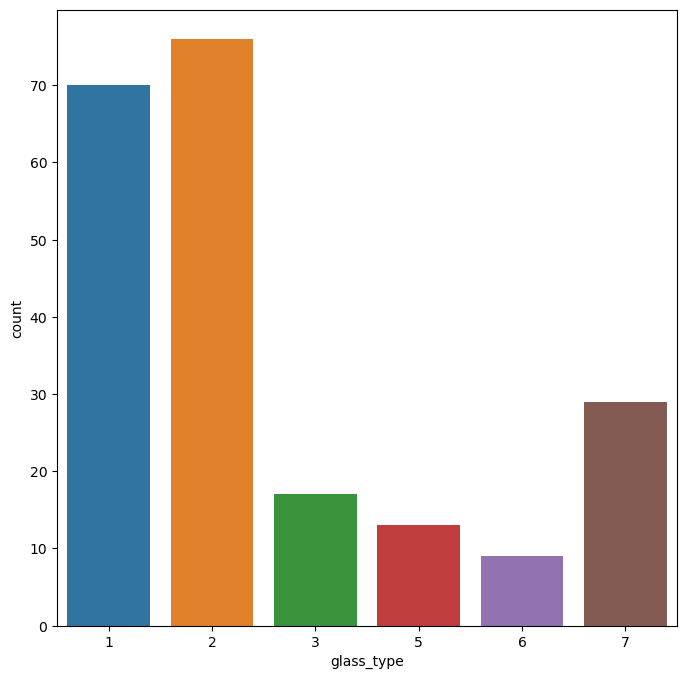

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(df['glass_type'])
print ('Value Count :- ',df['glass_type'].value_counts())

In [15]:
# Checking number of unique values in each column
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Id,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


<AxesSubplot:xlabel='RI', ylabel='Density'>

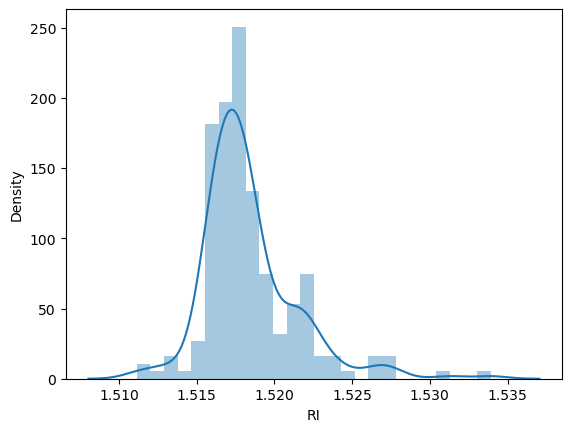

In [16]:
sns.distplot(df['RI'])

### RI is highly skewed

<AxesSubplot:xlabel='Na', ylabel='Density'>

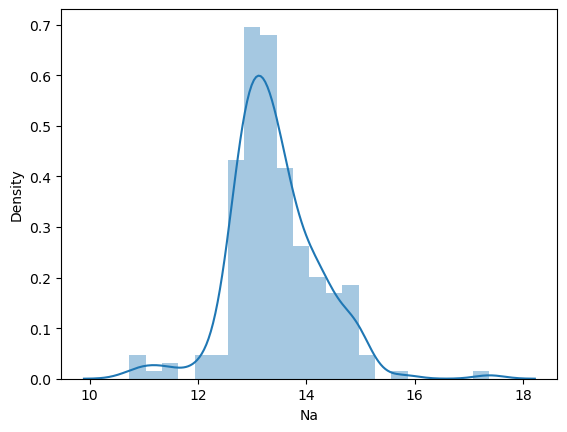

In [17]:
sns.distplot(df['Na'])

### Na is highly skewed

<AxesSubplot:xlabel='Mg', ylabel='Density'>

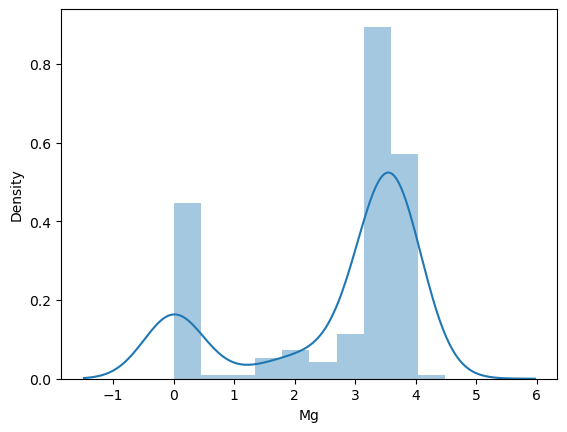

In [18]:
sns.distplot(df['Mg'])

### Mg is highly skewed

<AxesSubplot:xlabel='Al', ylabel='Density'>

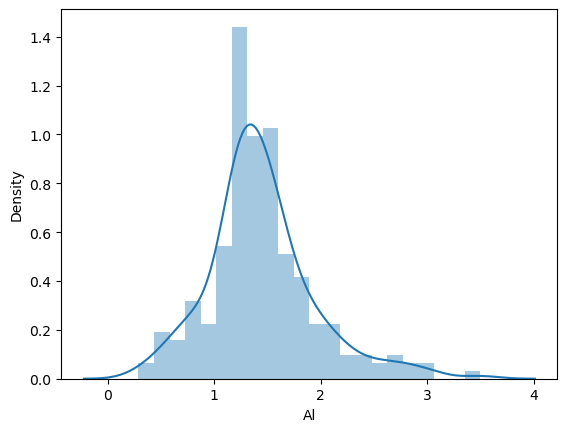

In [19]:
sns.distplot(df['Al'])

### Al is highly skewed

<AxesSubplot:xlabel='Si', ylabel='Density'>

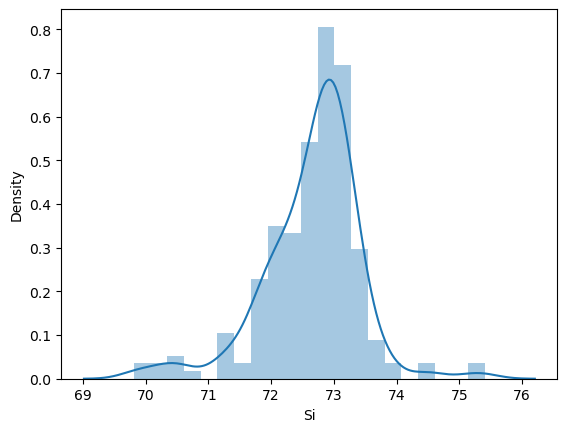

In [20]:
sns.distplot(df['Si'])

### Si is highly skewed

<AxesSubplot:xlabel='K', ylabel='Density'>

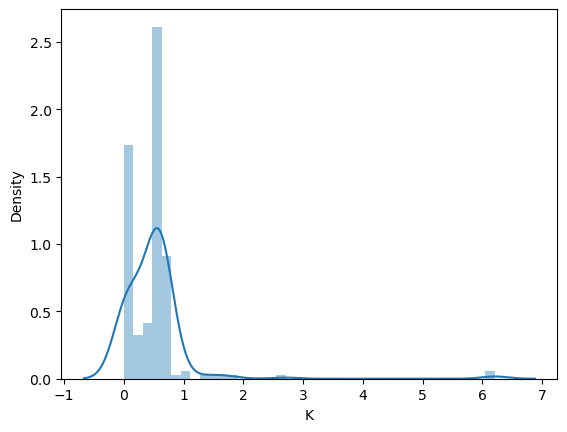

In [21]:
sns.distplot(df['K'])

### so here it is visible k Potassium is highly skewed

<AxesSubplot:xlabel='Ca', ylabel='Density'>

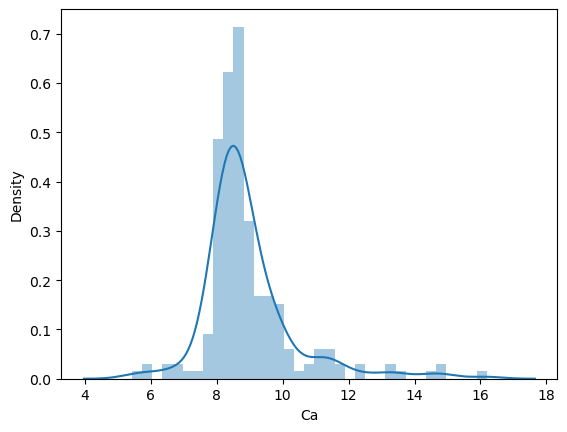

In [22]:
sns.distplot(df['Ca'])

### Ca calcium is highly skewed

<AxesSubplot:xlabel='Ba', ylabel='Density'>

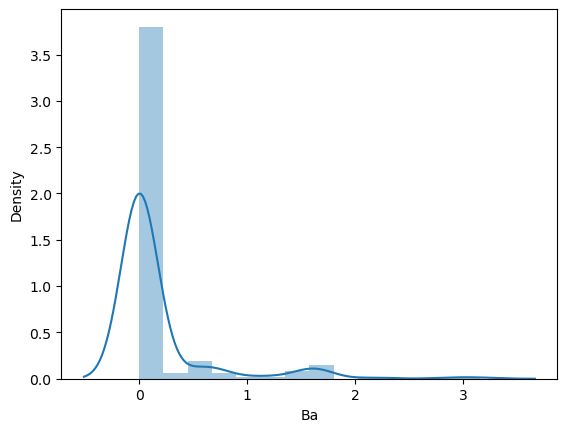

In [23]:
sns.distplot(df['Ba'])

### Ba is highly skewed

<AxesSubplot:xlabel='Fe', ylabel='Density'>

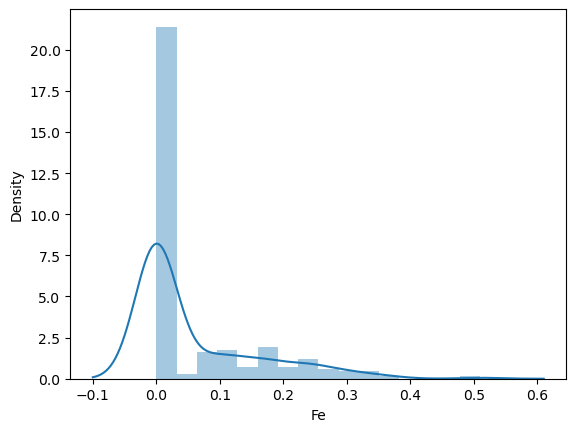

In [24]:
sns.distplot(df['Fe'])

### Fe is highly skewed

we will treat skewness later

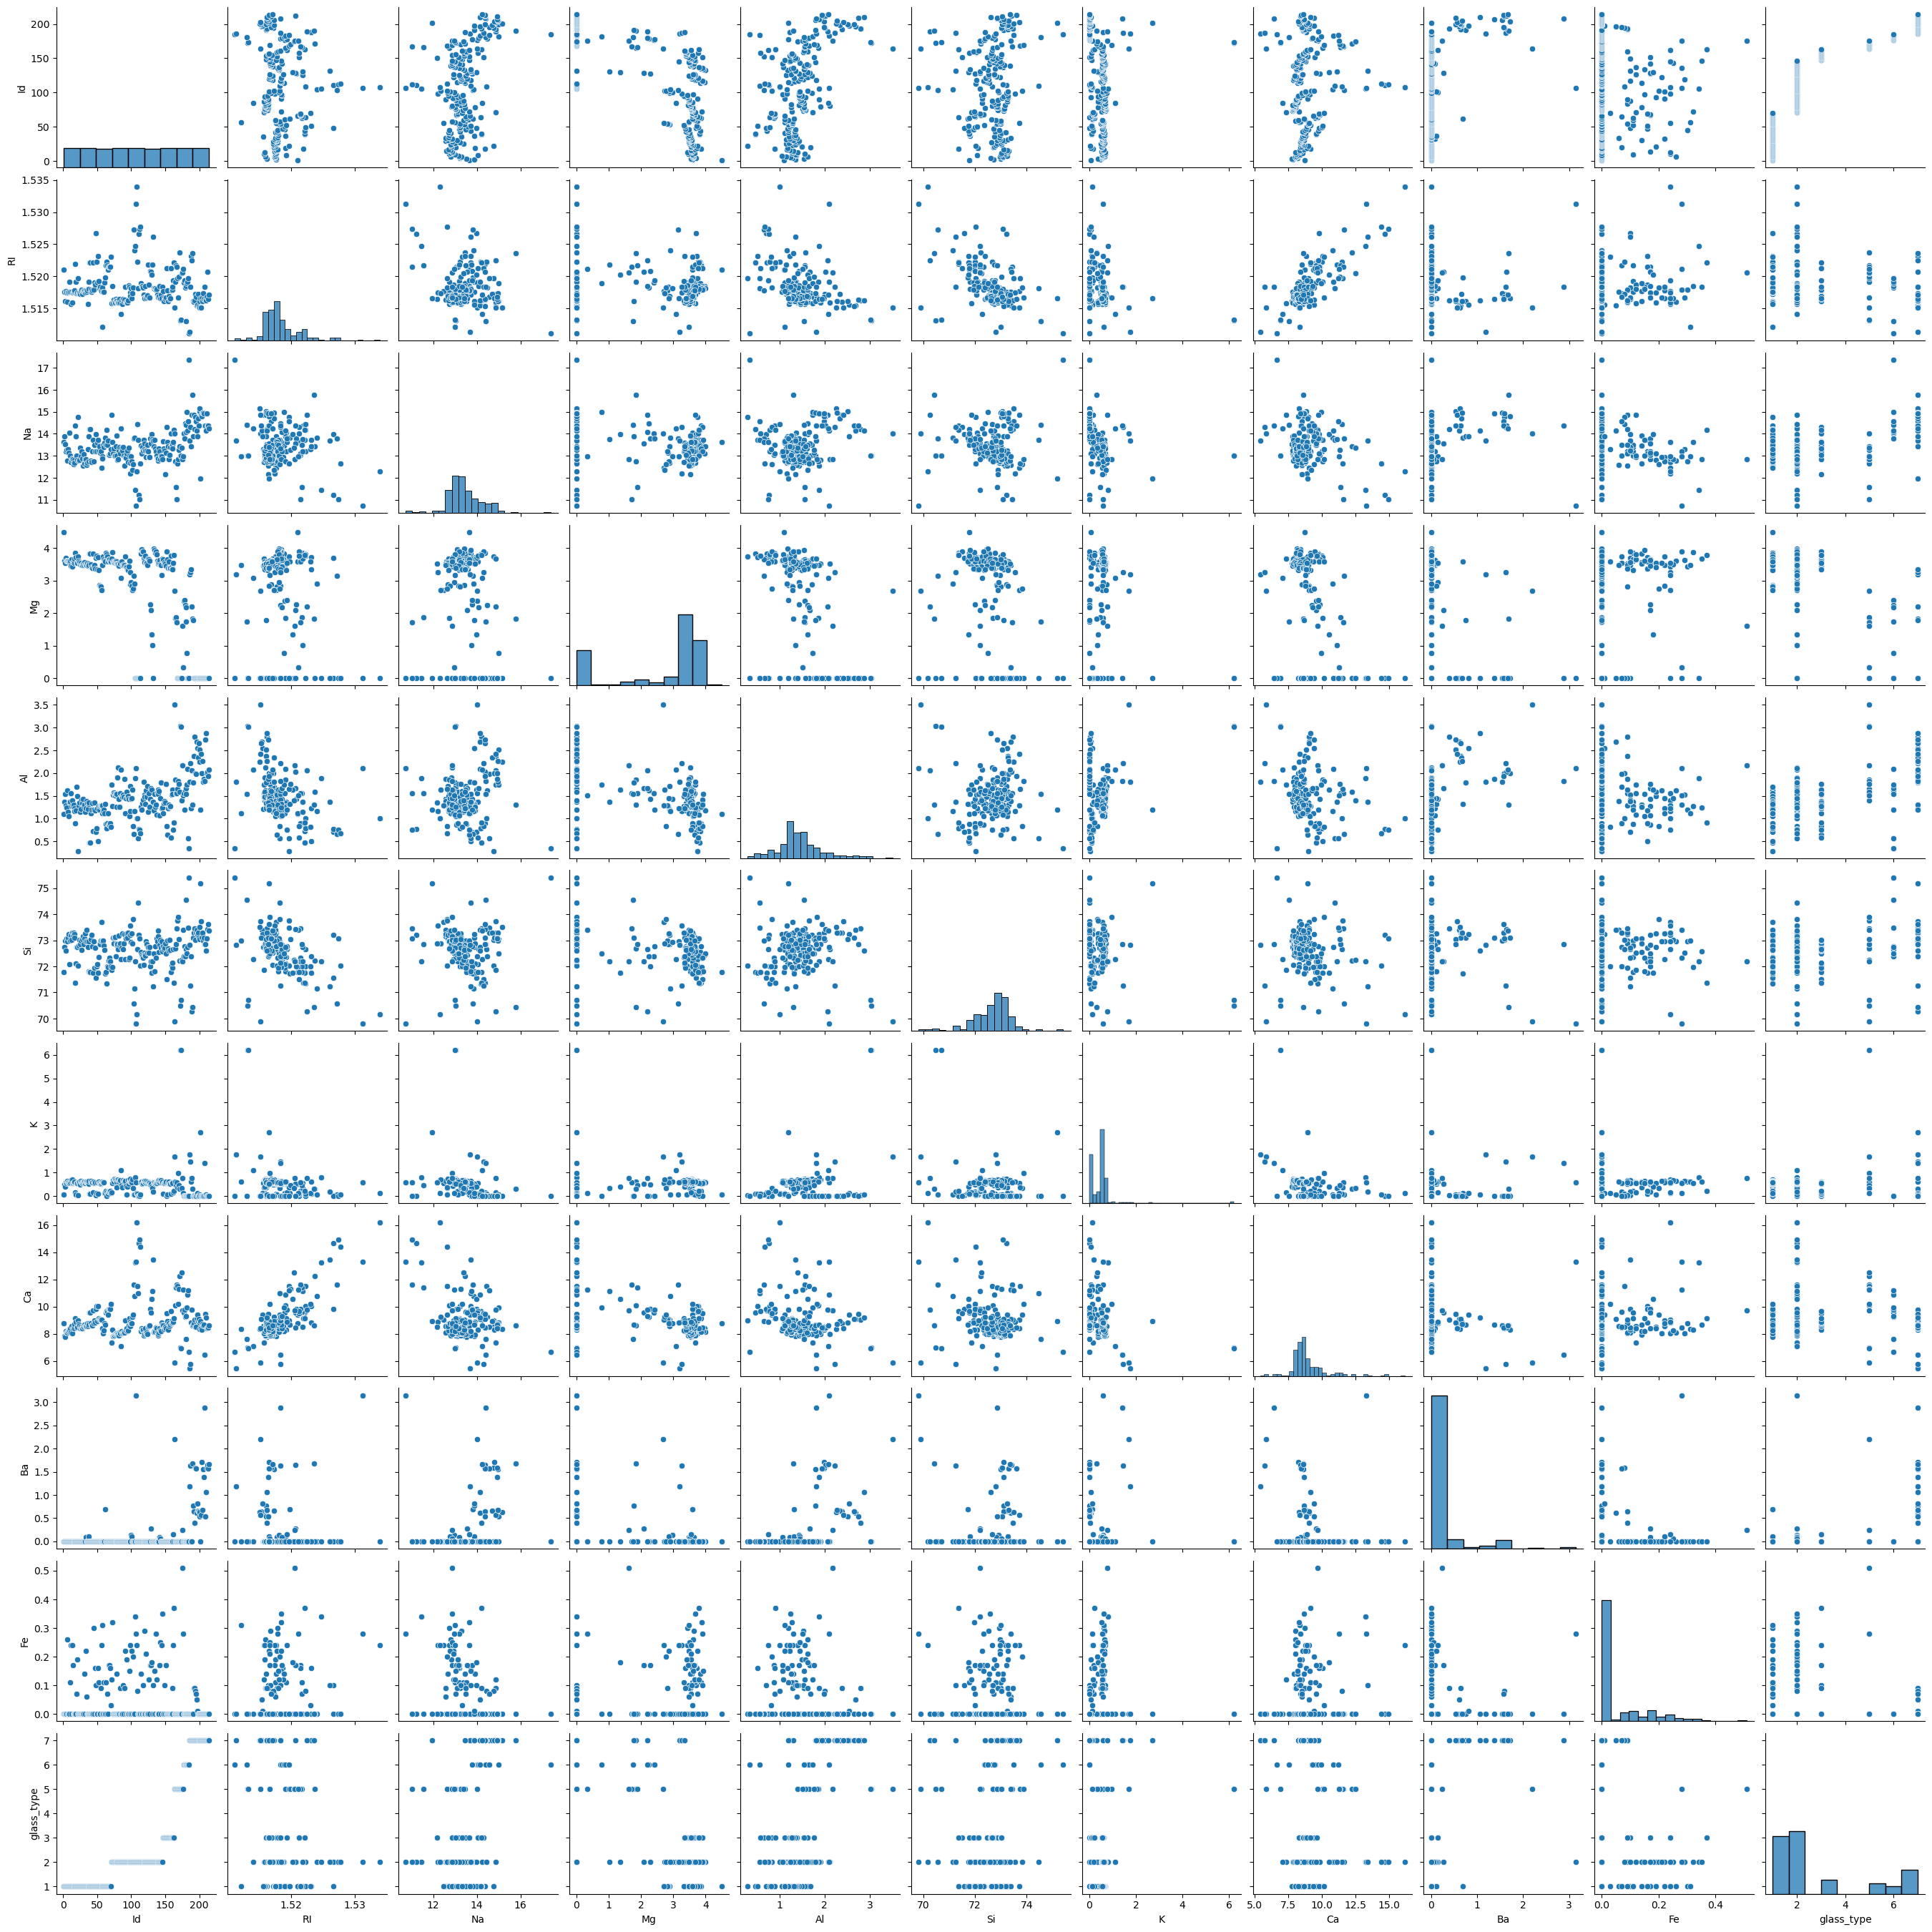

In [25]:
sns.pairplot(df)

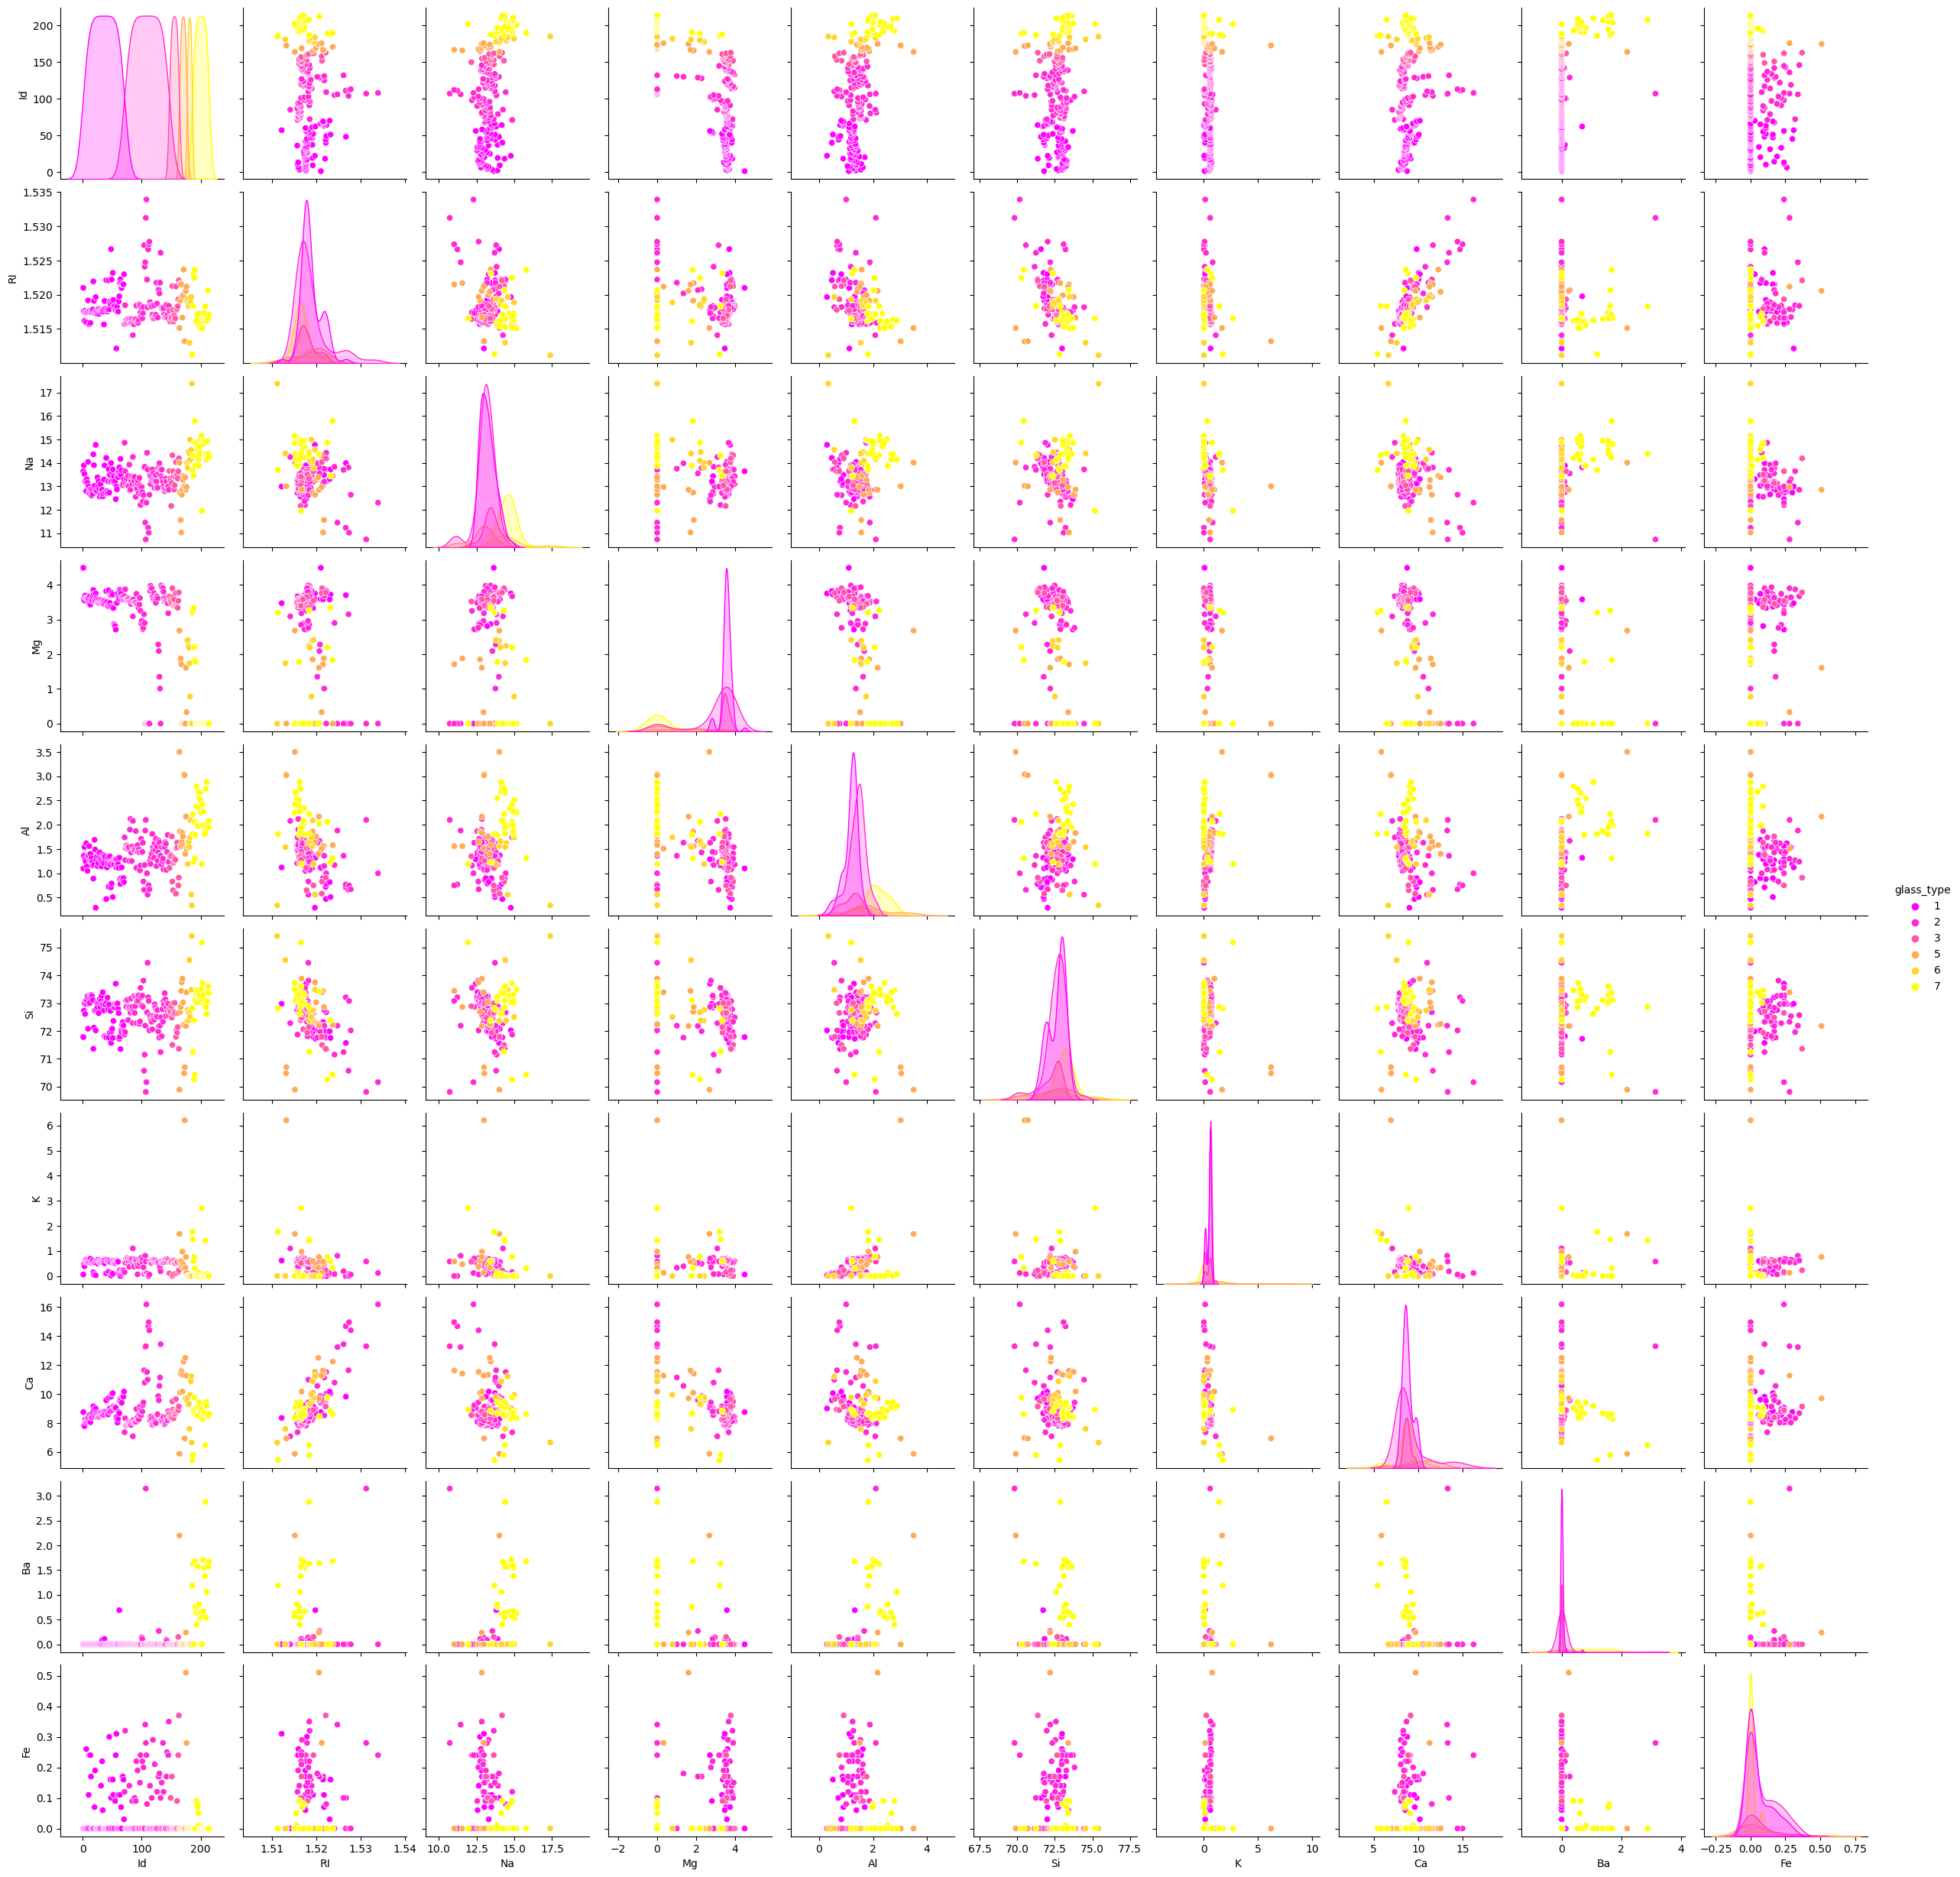

In [26]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="glass_type",palette="spring")

#### This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "glass_type". Here we can observe the relation between the features and label

Id               AxesSubplot(0.125,0.747241;0.133621x0.132759)
RI            AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Na             AxesSubplot(0.44569,0.747241;0.133621x0.132759)
Mg            AxesSubplot(0.606034,0.747241;0.133621x0.132759)
Al            AxesSubplot(0.766379,0.747241;0.133621x0.132759)
Si               AxesSubplot(0.125,0.587931;0.133621x0.132759)
K             AxesSubplot(0.285345,0.587931;0.133621x0.132759)
Ca             AxesSubplot(0.44569,0.587931;0.133621x0.132759)
Ba            AxesSubplot(0.606034,0.587931;0.133621x0.132759)
Fe            AxesSubplot(0.766379,0.587931;0.133621x0.132759)
glass_type       AxesSubplot(0.125,0.428621;0.133621x0.132759)
dtype: object

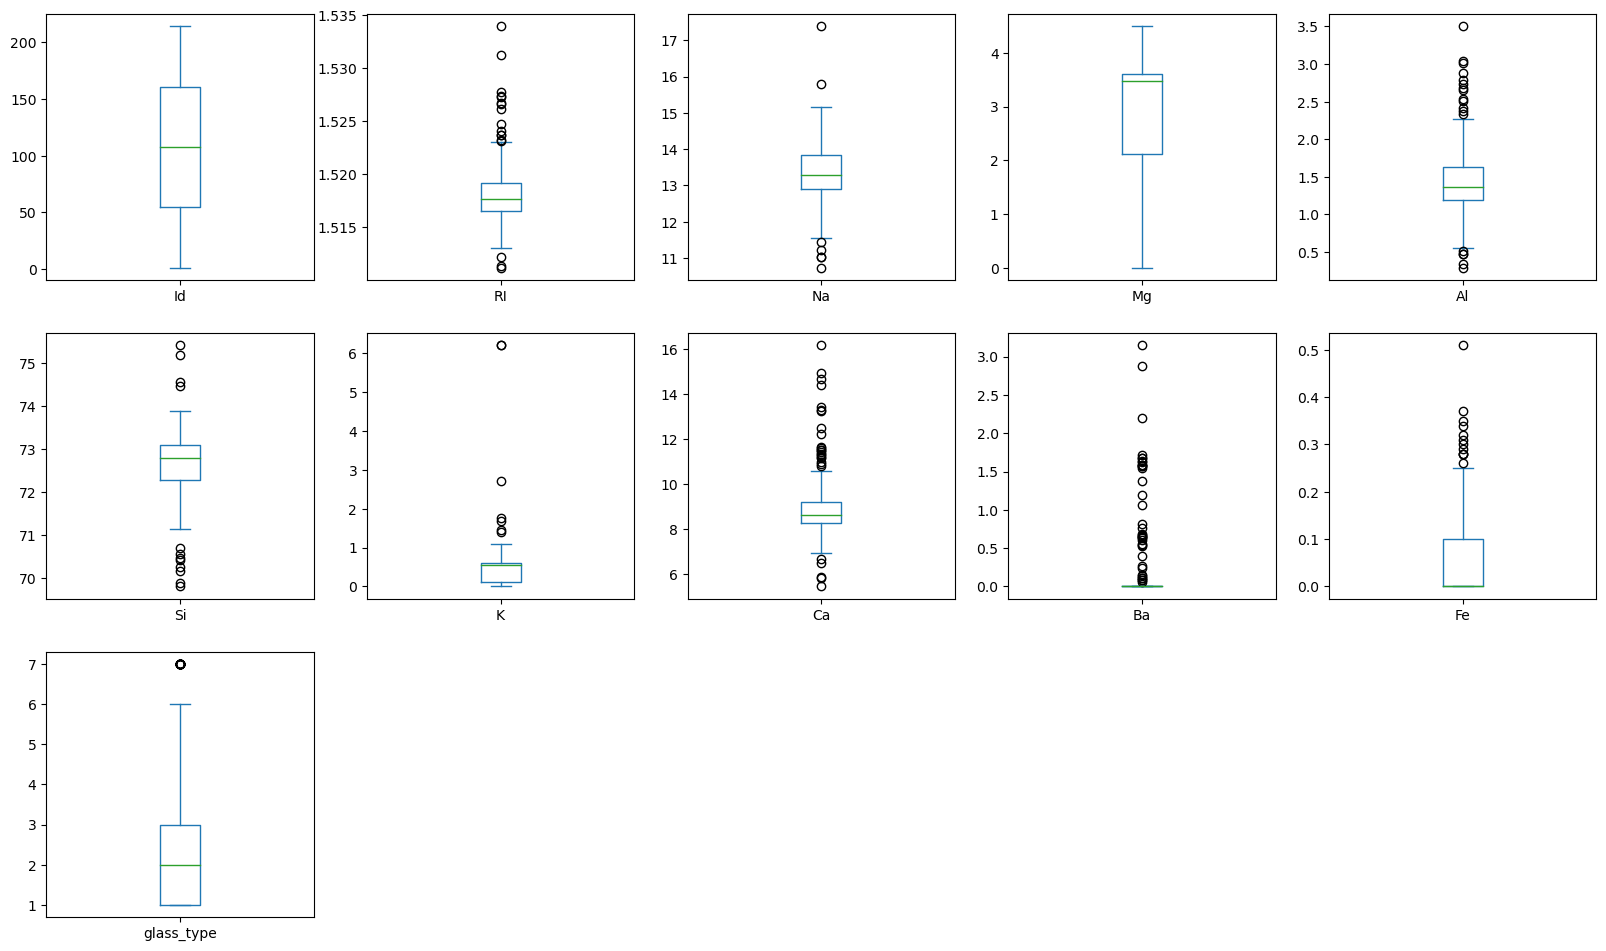

In [27]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,20))

#### so it is very visible that Rl Na Al Si K Ca Ba Fe all feature column have outliers except Mg.. we will treat outliers later

### CORRELATION

In [28]:
df.corr()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
Id,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


In [29]:
df.corr()['glass_type'].sort_values()

Mg           -0.744993
Fe           -0.188278
RI           -0.164237
K            -0.010054
Ca            0.000952
Si            0.151565
Na            0.502898
Ba            0.575161
Al            0.598829
Id            0.877357
glass_type    1.000000
Name: glass_type, dtype: float64

#### This is features correlation with Target

In [30]:
df.drop("Id",axis=1,inplace= True)

## As id is of no use so we are removing id

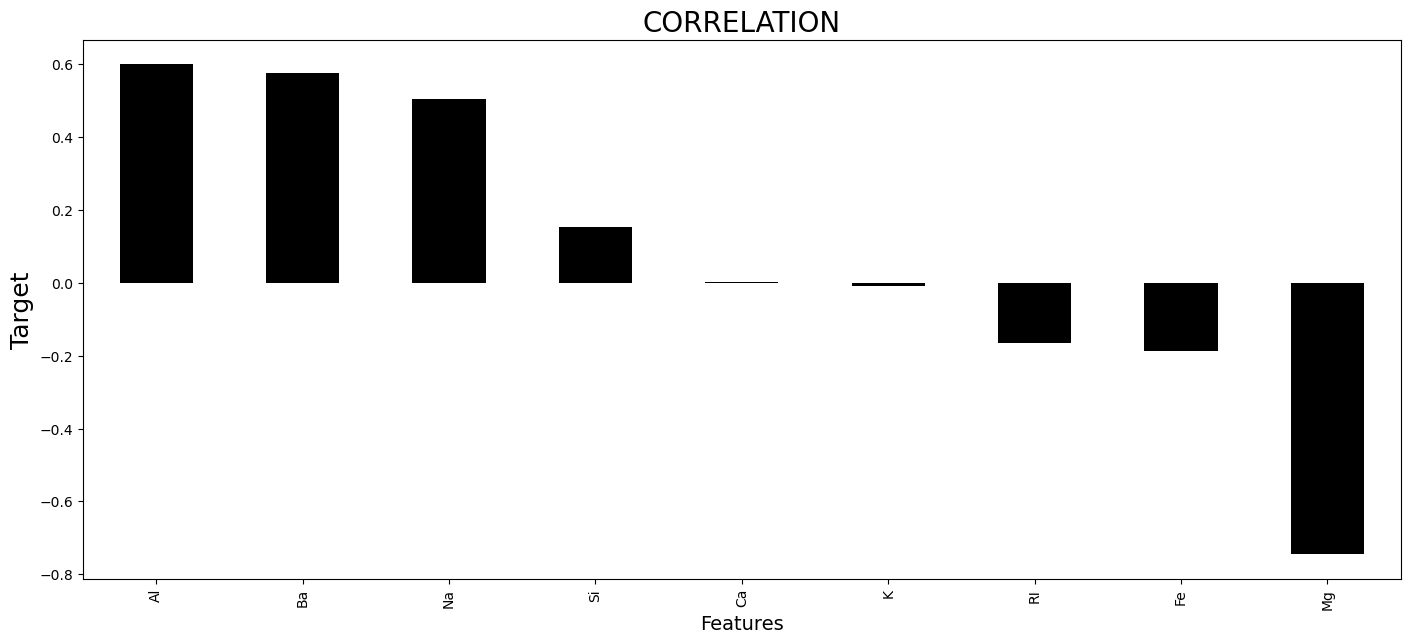

In [31]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['glass_type'].sort_values(ascending=False).drop(['glass_type']).plot(kind='bar',color='black')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

#### We can see thst some column are positively correlated and some are negetively correlated

In [32]:
df.drop('Ba',axis=1,inplace= True)
df.drop('Fe',axis=1,inplace= True)

# as these two have high number of 0.0 value so dropping this columns

### DESCRIPTIVE STATISTICS

In [33]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,7.000000


#### We can see that there is no missing value but there is outliers and skewness present which we will check further

<AxesSubplot:>

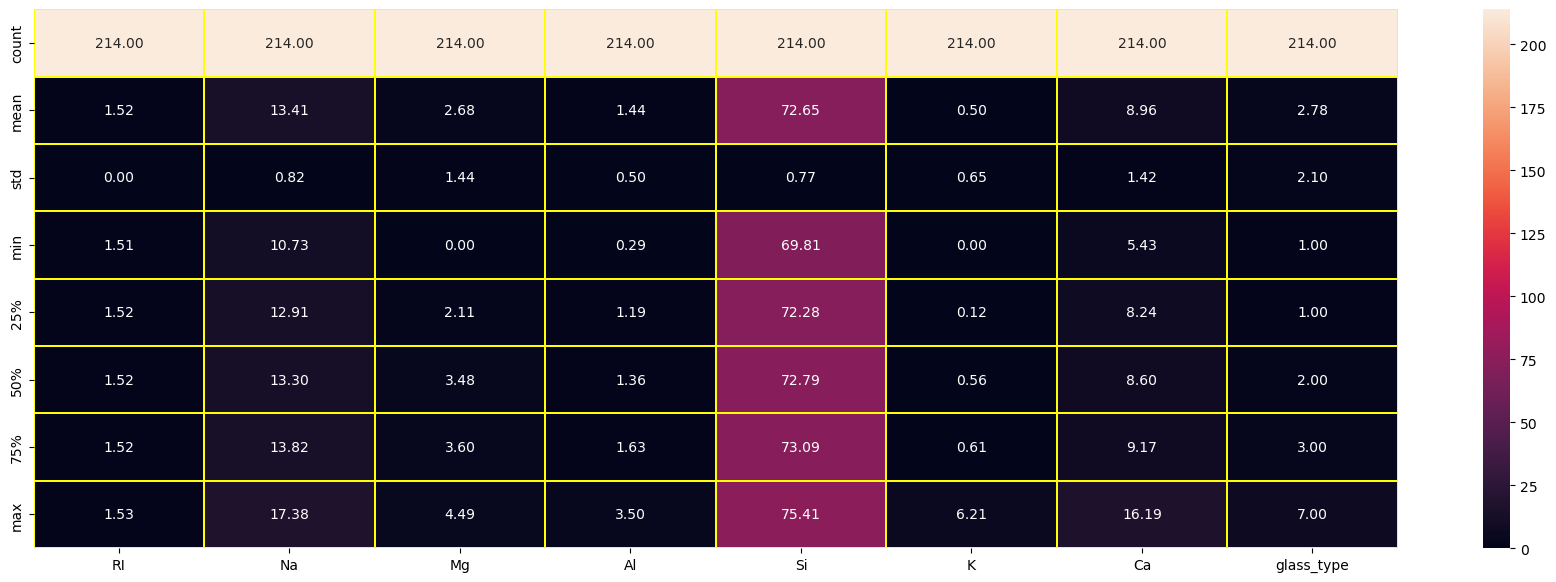

In [34]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="yellow",fmt="0.2f")

### Lets Check Skewness

In [35]:
df.skew()

RI            1.625431
Na            0.454181
Mg           -1.152559
Al            0.907290
Si           -0.730447
K             6.551648
Ca            2.047054
glass_type    1.114915
dtype: float64

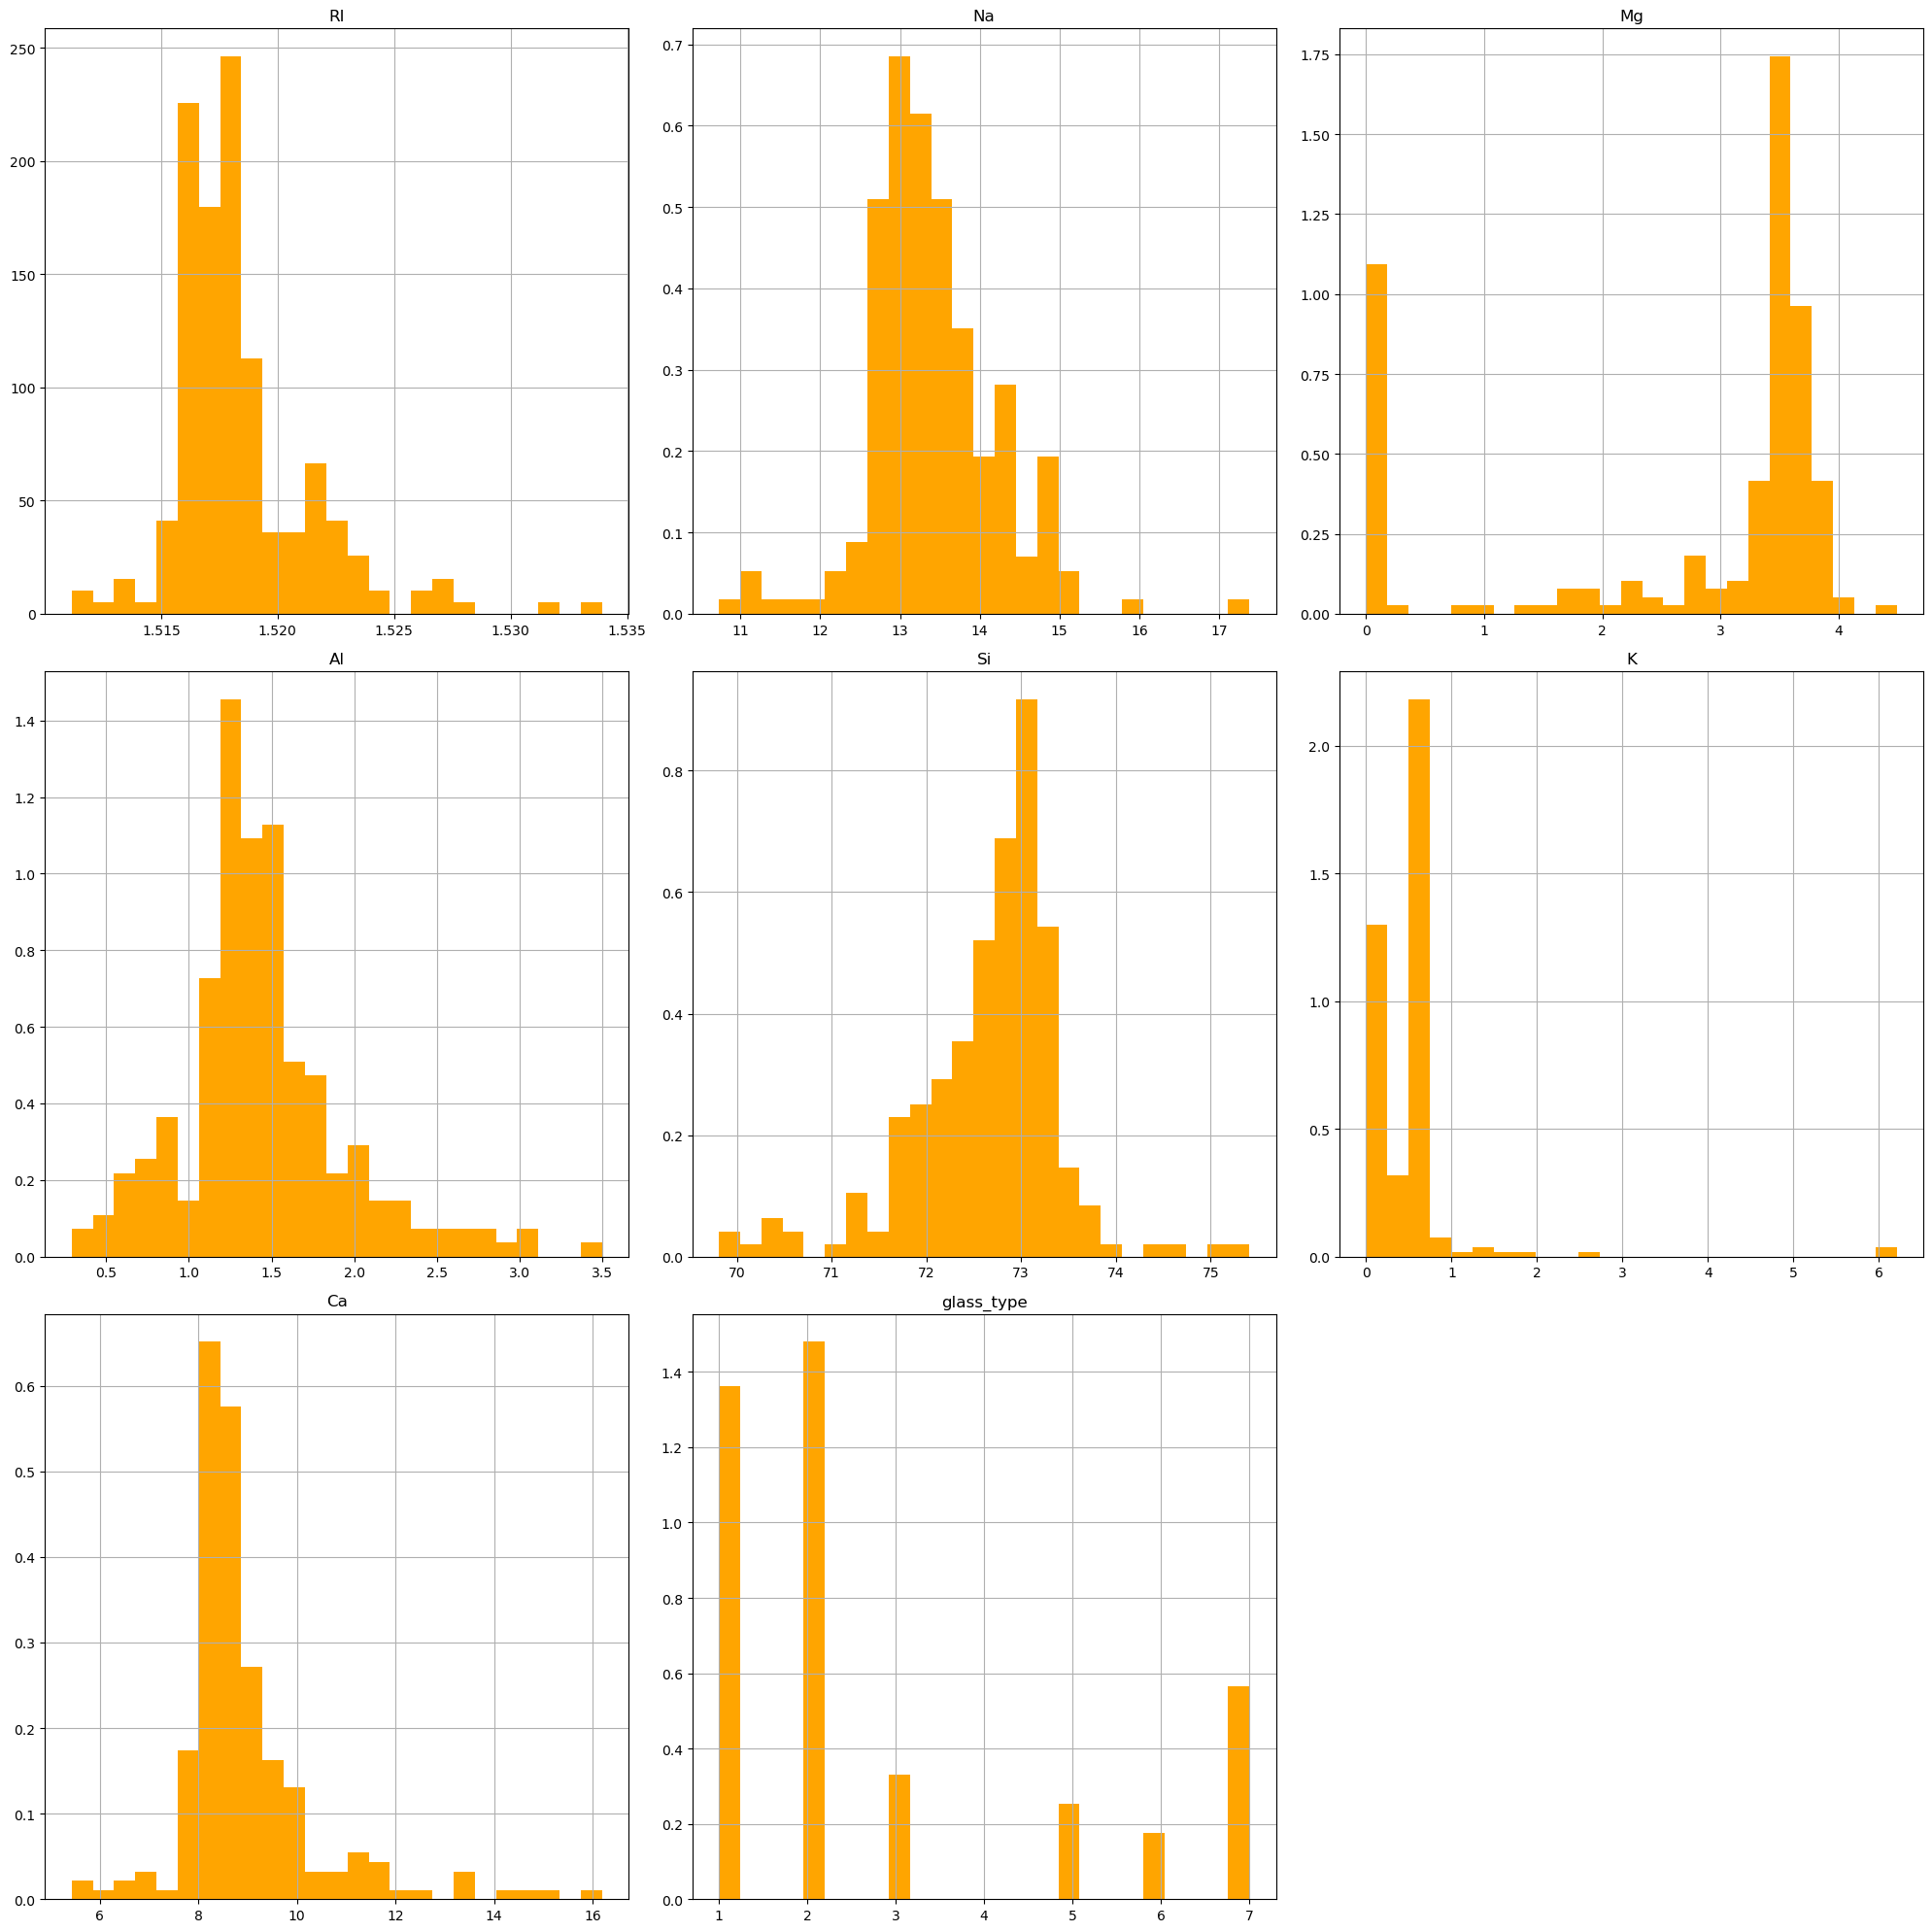

In [36]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='orange',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

### Lets Remove Outliers Now

In [37]:
from scipy.stats import zscore

In [38]:
# Features containing outliers
features = df[['RI','Na','Al','Si','K','Ca']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,RI,Na,Al,Si,K,Ca
0,0.872868,0.284953,0.692442,1.127082,0.671705,0.145766
1,0.249333,0.591817,0.170460,0.102319,0.026213,0.793734
2,0.721318,0.149933,0.190912,0.438787,0.164533,0.828949
3,0.232831,0.242853,0.310994,0.052974,0.112107,0.519052
4,0.312045,0.169205,0.411375,0.555256,0.081369,0.624699
...,...,...,...,...,...,...
209,0.704815,0.898681,2.881125,0.052974,0.640968,0.157088
210,0.500178,1.856097,1.094342,0.529374,0.763919,0.392276
211,0.754046,1.168721,1.154570,0.995252,0.763919,0.364103
212,0.612399,1.193270,0.993960,1.241133,0.763919,0.335931


In [39]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,RI,Na,Mg,Al,Si,K,Ca,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,7


In [40]:
df_new.shape

(201, 8)

In [41]:
df.shape

(214, 8)

In [42]:
# Percentage of data loss

dataloss=((214-201)/214)*100
dataloss

6.074766355140187

#### So here we having 6.07% data loss

### IQR Method

In [43]:
#1st quantile
Q1=df.quantile(0.25)

# 3rd quantile
Q3=df.quantile(0.75)

#IQR
IQR=Q3 - Q1
qq=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [44]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",qq.shape)
print("\nTotal Dropped rows:",df.shape[0]-qq.shape[0])

Old DataFrame data in Rows and Column: (214, 8)

New DataFrame data in Rows and Column: (153, 8)

Total Dropped rows: 61


In [45]:
# Precentag eof data loss

dataloss_1=((2318-1931)/2318)*100
dataloss_1

16.695427092320966

#### So here we are having 16.6% data loss

RI               AxesSubplot(0.125,0.747241;0.133621x0.132759)
Na            AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Mg             AxesSubplot(0.44569,0.747241;0.133621x0.132759)
Al            AxesSubplot(0.606034,0.747241;0.133621x0.132759)
Si            AxesSubplot(0.766379,0.747241;0.133621x0.132759)
K                AxesSubplot(0.125,0.587931;0.133621x0.132759)
Ca            AxesSubplot(0.285345,0.587931;0.133621x0.132759)
glass_type     AxesSubplot(0.44569,0.587931;0.133621x0.132759)
dtype: object

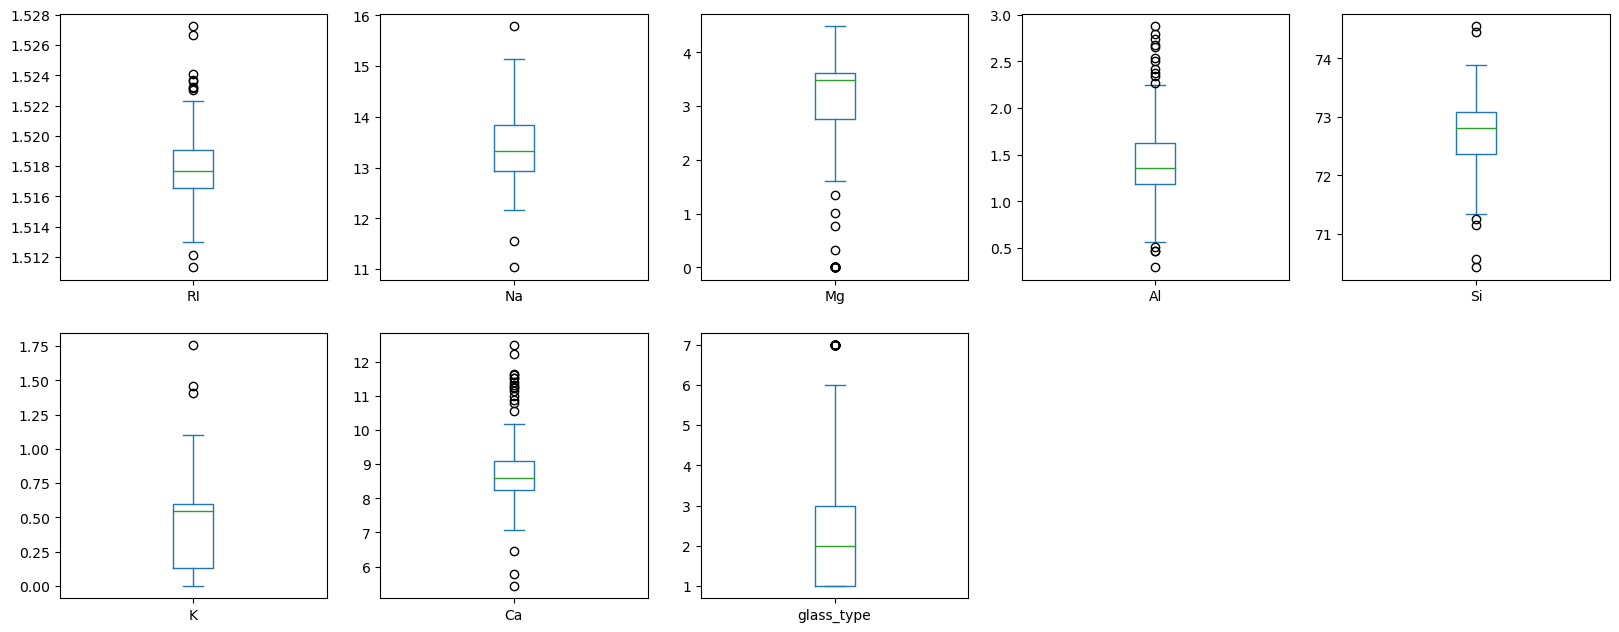

In [46]:
df_new.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,20))

#### So here we will go zscore as it is having less data loss than IQR

### * Lets Remove Skewness Now*

In [47]:
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [48]:
#Removing skewness using yeo-johnson
df_new[['RI','Na','Mg','Al','Si','K','Ca']] = PT.fit_transform(df_new[['RI','Na','Mg','Al','Si','K','Ca']].values)

In [49]:
l1=['RI','Na','Mg','Al','Si','K','Ca']

In [50]:
df_new.skew()

RI            0.000000
Na           -0.026383
Mg           -0.989652
Al            0.013277
Si            0.056350
K             0.005150
Ca           -0.062276
glass_type    1.180372
dtype: float64

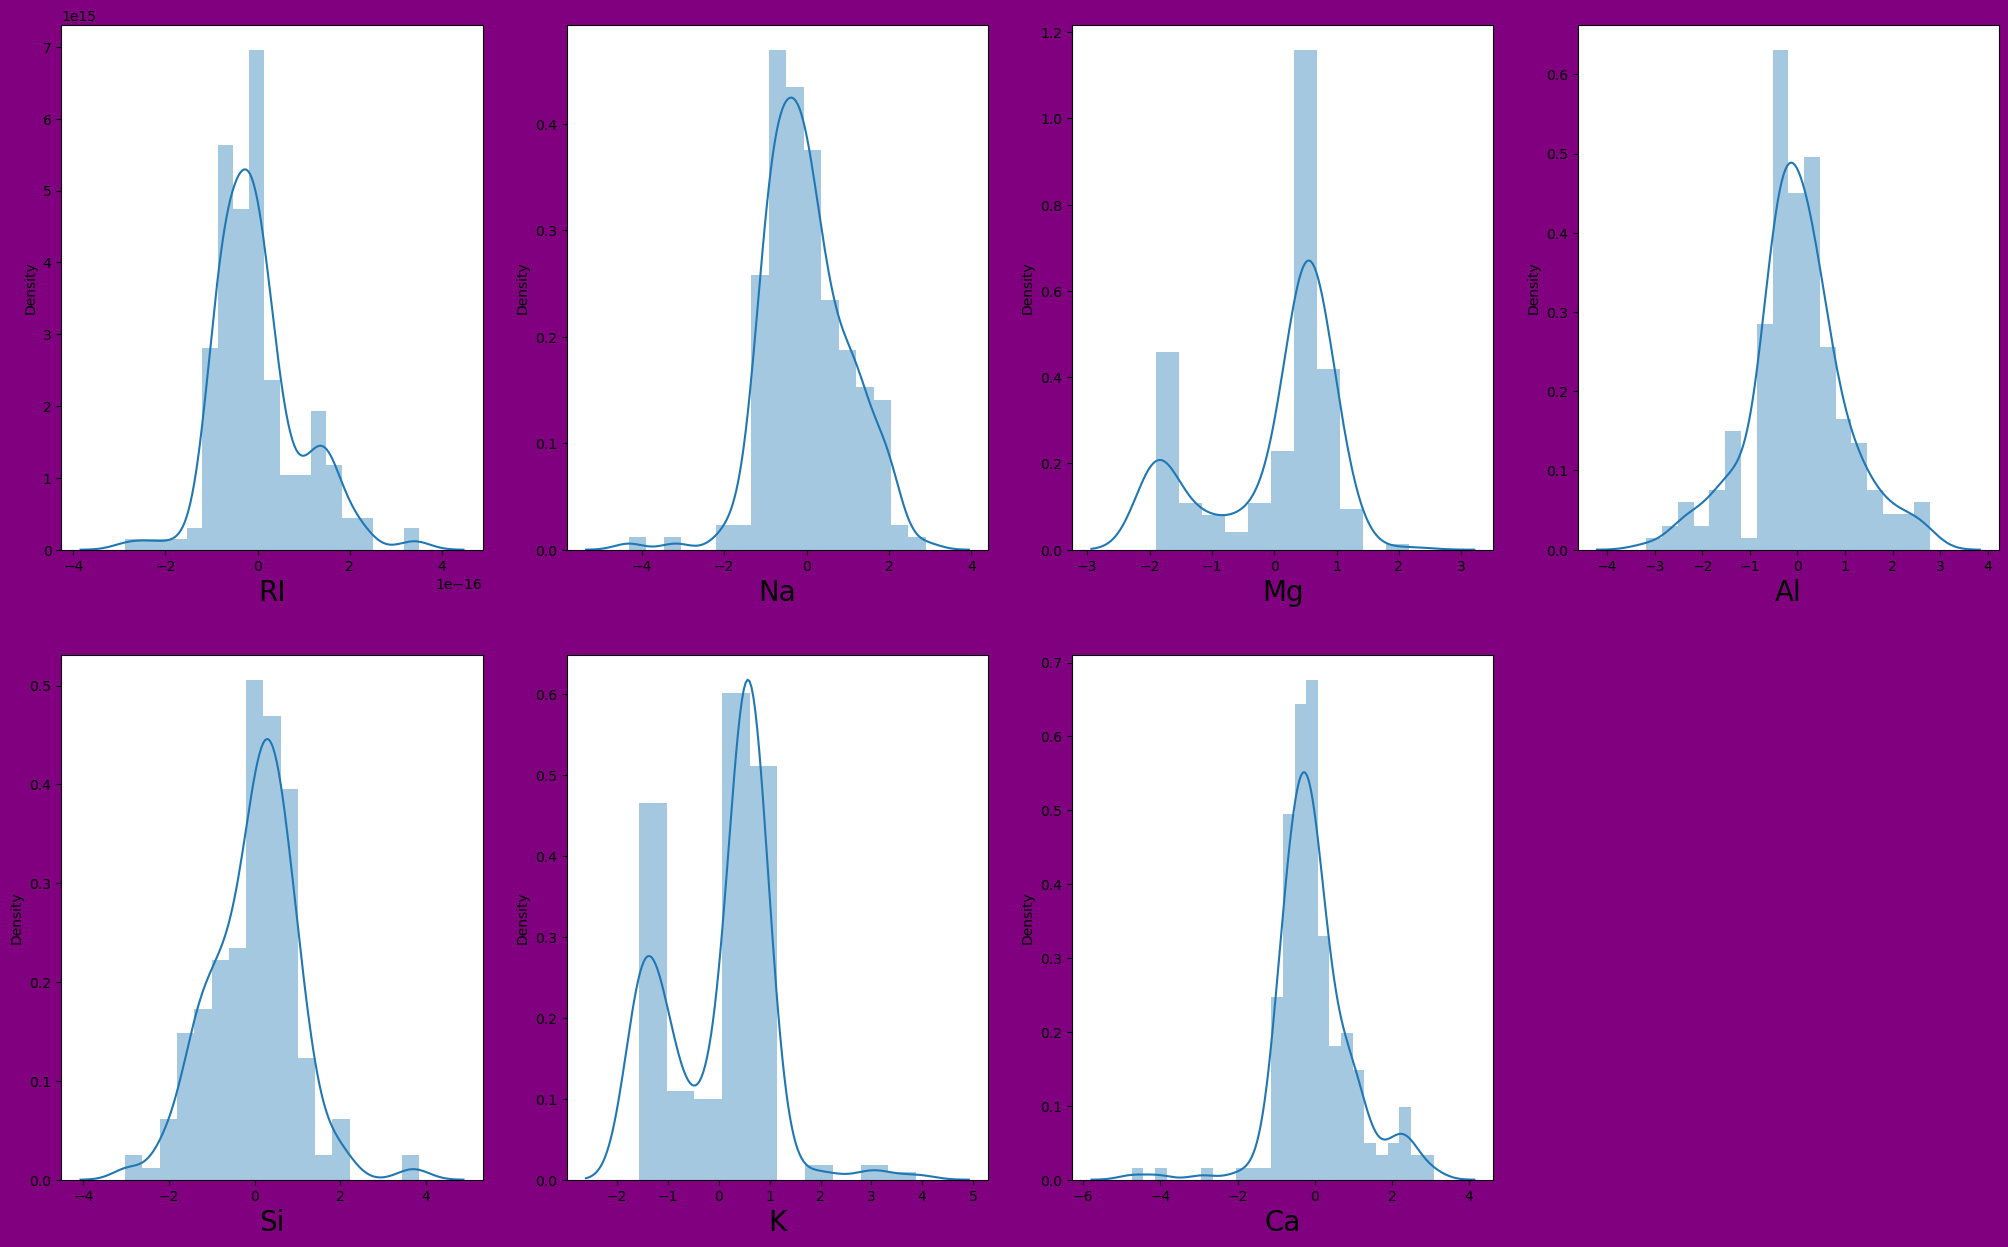

In [51]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(25,15), facecolor='purple')
plotnumber = 1

for column in df_new[l1]:
    if plotnumber<=9:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Now it is very clear that skewness hass been removed and all features got normalized

### Now lets split the dataset in dependent and independent dataset

In [52]:
df_new.head()

,RI,Na,Mg,Al,Si,K,Ca,glass_type
0,1.179612e-16,0.339501,2.169617,-0.720906,-1.470991,-1.329665,0.007840,1
1,-1.734723e-17,0.683061,0.607744,-0.091440,-0.030142,0.210816,-1.035673,1
2,-7.979728e-17,0.183789,0.533625,0.313703,0.424954,-0.098767,-1.097042,1
3,-1.734723e-17,-0.285846,0.744670,-0.255436,-0.230825,0.511153,-0.574259,1
4,-2.775558e-17,-0.195845,0.637781,-0.374956,0.589187,0.445168,-0.748200,1


In [53]:
x=df_new.loc [:,df_new.columns != 'glass_type']
# Independent Variable

In [54]:
y=df_new.loc[:,'glass_type']
# dependent variable

In [55]:
x

,RI,Na,Mg,Al,Si,K,Ca
0,1.179612e-16,0.339501,2.169617,-0.720906,-1.470991,-1.329665,0.007840
1,-1.734723e-17,0.683061,0.607744,-0.091440,-0.030142,0.210816,-1.035673
2,-7.979728e-17,0.183789,0.533625,0.313703,0.424954,-0.098767,-1.097042
3,-1.734723e-17,-0.285846,0.744670,-0.255436,-0.230825,0.511153,-0.574259
4,-2.775558e-17,-0.195845,0.637781,-0.374956,0.589187,0.445168,-0.748200
...,...,...,...,...,...,...,...
209,-7.632783e-17,1.012933,-1.891584,2.787367,-0.230825,-1.250044,0.446308
210,-4.857226e-17,1.962165,-1.891584,1.237607,0.552386,-1.573130,-0.371051
211,1.006140e-16,1.292500,-1.891584,1.295290,1.242370,-1.573130,-0.326685
212,-6.591949e-17,1.317436,-1.891584,1.140470,1.631011,-1.573130,-0.282600


In [56]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: glass_type, Length: 201, dtype: int64

In [57]:
x.shape

(201, 7)

In [58]:
y.shape

(201,)

### Now lets scale the data

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca
0,1.276094,0.339501,2.169617,-0.720906,-1.470991,-1.329665,0.007840
1,-0.187233,0.683061,0.607744,-0.091440,-0.030142,0.210816,-1.035673
2,-0.862614,0.183789,0.533625,0.313703,0.424954,-0.098767,-1.097042
3,-0.187233,-0.285846,0.744670,-0.255436,-0.230825,0.511153,-0.574259
4,-0.299796,-0.195845,0.637781,-0.374956,0.589187,0.445168,-0.748200
...,...,...,...,...,...,...,...
196,-0.825093,1.012933,-1.891584,2.787367,-0.230825,-1.250044,0.446308
197,-0.524923,1.962165,-1.891584,1.237607,0.552386,-1.573130,-0.371051
198,1.088488,1.292500,-1.891584,1.295290,1.242370,-1.573130,-0.326685
199,-0.712529,1.317436,-1.891584,1.140470,1.631011,-1.573130,-0.282600


### WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [63]:
vif_cal()

   VIF FACTOR FEATURES
0    4.406308       RI
1    6.468622       Na
2    8.363145       Mg
3    3.969032       Al
4    5.018795       Si
5    4.389737        K
6    6.854219       Ca


#### No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models.

In [66]:
##Balancing the dataset over here,otherwise it will be a baised dataset
from imblearn.over_sampling import SMOTE

In [67]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [68]:
x.shape

(420, 7)

In [69]:
y.shape

(420,)

<AxesSubplot:xlabel='glass_type', ylabel='count'>

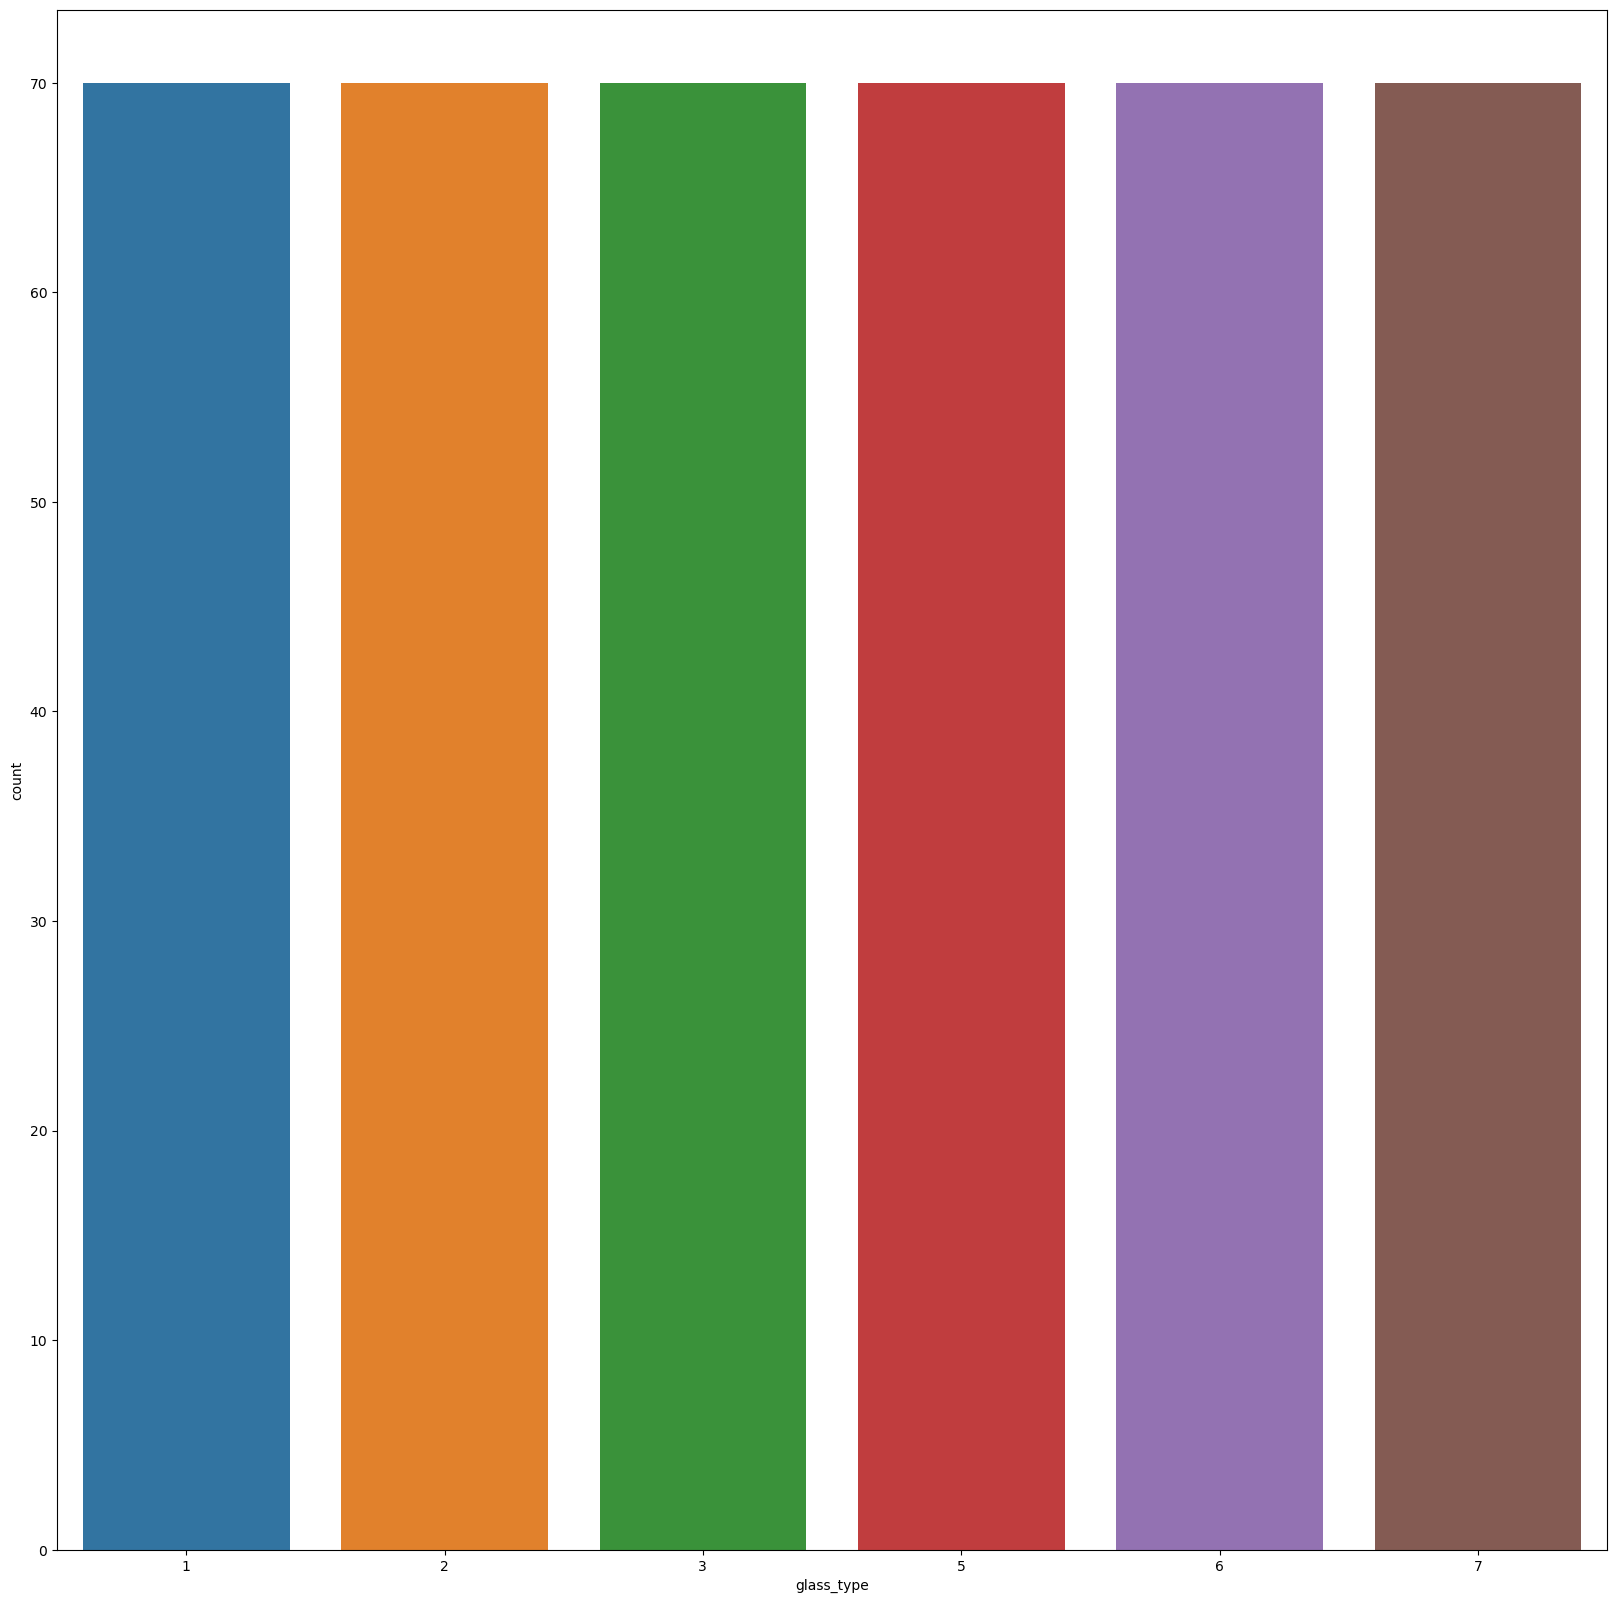

In [70]:
sns.countplot(y)

### Now my dataset is balanced

### Model Testing and Testing

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split

In [72]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  49  The model performs very well
At random_state:- 49
Training accuaracy_score is :- 84.5
Testing accuracy_score is:- 84.5 




In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=49)

In [74]:
# train the model
lr.fit(x_train,y_train)

LogisticRegression()

In [75]:
# predict the  data with x_test

pred_test=lr.predict(x_test)

In [76]:
accuracy_score(y_test,pred_test)

0.8452380952380952

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       0.86      0.50      0.63        12
           2       0.69      0.56      0.62        16
           3       0.74      1.00      0.85        14
           5       0.93      1.00      0.96        13
           6       0.93      1.00      0.97        14
           7       0.94      1.00      0.97        15

    accuracy                           0.85        84
   macro avg       0.85      0.84      0.83        84
weighted avg       0.84      0.85      0.83        84



### CROSS VALIDATION FOR LOGISTICS REGRESSION

In [79]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

In [80]:
for i in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 2
Cross validation score is :- 75.47619047619048
Accuracy_score is :- 84.52380952380952


At cv:- 3
Cross validation score is :- 80.71428571428572
Accuracy_score is :- 84.52380952380952


At cv:- 4
Cross validation score is :- 79.76190476190477
Accuracy_score is :- 84.52380952380952


At cv:- 5
Cross validation score is :- 81.42857142857143
Accuracy_score is :- 84.52380952380952


At cv:- 6
Cross validation score is :- 80.23809523809523
Accuracy_score is :- 84.52380952380952


At cv:- 7
Cross validation score is :- 81.66666666666667
Accuracy_score is :- 84.52380952380952


At cv:- 8
Cross validation score is :- 81.43595791001451
Accuracy_score is :- 84.52380952380952


At cv:- 9
Cross validation score is :- 81.90975434268681
Accuracy_score is :- 84.52380952380952




In [81]:
# I will take CV as 7 bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=5).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.8142857142857143 
The accuracy_score is: 0.8452380952380952


#### Our logistic Regression Model is performing at 84% which is good

### DECISION TREE CLASSIFIER

In [82]:
# Checking Accuracy for Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

#Prediction
preddt = dt.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))
print('CV  :-',cross_val_score(dt,x,y,cv=5).mean())

0.8928571428571429
[[10  1  1  0  0  0]
 [ 3  9  1  1  1  1]
 [ 0  0 14  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 15]]
              precision    recall  f1-score   support

           1       0.77      0.83      0.80        12
           2       0.90      0.56      0.69        16
           3       0.88      1.00      0.93        14
           5       0.93      1.00      0.96        13
           6       0.93      1.00      0.97        14
           7       0.94      1.00      0.97        15

    accuracy                           0.89        84
   macro avg       0.89      0.90      0.89        84
weighted avg       0.89      0.89      0.88        84

CV  :- 0.8380952380952381


#### Decision Tree Classifier is performing at 90%

In [83]:
# Checking accuracy for KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))
print('CV  :-',cross_val_score(knn,x,y,cv=5).mean())

0.8452380952380952
[[ 8  0  4  0  0  0]
 [ 2  9  3  1  1  0]
 [ 0  1 13  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  1  0  0 14]]
              precision    recall  f1-score   support

           1       0.80      0.67      0.73        12
           2       0.90      0.56      0.69        16
           3       0.62      0.93      0.74        14
           5       0.93      1.00      0.96        13
           6       0.93      1.00      0.97        14
           7       1.00      0.93      0.97        15

    accuracy                           0.85        84
   macro avg       0.86      0.85      0.84        84
weighted avg       0.87      0.85      0.84        84

CV  :- 0.8571428571428571


#### KNN is performing at 85%

### ENSEMBLE TECHNIQUE

In [84]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))
print('CV  :-',cross_val_score(rf,x,y,cv=5).mean())

0.9166666666666666
[[ 9  1  2  0  0  0]
 [ 1 12  0  1  1  1]
 [ 0  0 14  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 15]]
              precision    recall  f1-score   support

           1       0.90      0.75      0.82        12
           2       0.92      0.75      0.83        16
           3       0.88      1.00      0.93        14
           5       0.93      1.00      0.96        13
           6       0.93      1.00      0.97        14
           7       0.94      1.00      0.97        15

    accuracy                           0.92        84
   macro avg       0.92      0.92      0.91        84
weighted avg       0.92      0.92      0.91        84

CV  :- 0.8619047619047618


#### Random Forest classifier is performing at 91%

In [85]:
# Checking accuracy for Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

print('CV  :-',cross_val_score(gb,x,y,cv=5).mean())

0.9404761904761905
[[ 9  0  3  0  0  0]
 [ 0 15  0  0  0  1]
 [ 0  0 14  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 14]]
              precision    recall  f1-score   support

           1       1.00      0.75      0.86        12
           2       0.94      0.94      0.94        16
           3       0.82      1.00      0.90        14
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        14
           7       0.93      0.93      0.93        15

    accuracy                           0.94        84
   macro avg       0.95      0.94      0.94        84
weighted avg       0.95      0.94      0.94        84

CV  :- 0.8547619047619047


#### Gradient boosting Classifier is performing at 94%

In [86]:
from sklearn.ensemble import ExtraTreesClassifier

# Checking accuracy for Gradient Boosting Classifier
et = ExtraTreesClassifier()
et.fit(x_train,y_train)

# Prediction
predet = et.predict(x_test)

print(accuracy_score(y_test, predet))
print(confusion_matrix(y_test, predet))
print(classification_report(y_test,predet))

print('CV  :-',cross_val_score(et,x,y,cv=5).mean())

0.9047619047619048
[[ 9  1  2  0  0  0]
 [ 1 12  0  1  1  1]
 [ 1  0 13  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 15]]
              precision    recall  f1-score   support

           1       0.82      0.75      0.78        12
           2       0.92      0.75      0.83        16
           3       0.87      0.93      0.90        14
           5       0.93      1.00      0.96        13
           6       0.93      1.00      0.97        14
           7       0.94      1.00      0.97        15

    accuracy                           0.90        84
   macro avg       0.90      0.90      0.90        84
weighted avg       0.90      0.90      0.90        84

CV  :- 0.8904761904761905


#### Extra Tree Classifier is performing at 93% and this is best model so far

### Making a dataframe of all the models accuracy score

In [87]:
mm=pd.DataFrame([["LR","83%"],["Decision Tree Classifier","83%"],["KNeighbors Classifier","90%"],["Random Forest Classifier","88%"],["Gradient Boosting","86%"],["Extra Tree Classifier","93%"]],
                    columns=["Model_Name","AccuracyScore"])

mm


,Model_Name,AccuracyScore
0,LR,83%
1,Decision Tree Classifier,83%
2,KNeighbors Classifier,90%
3,Random Forest Classifier,88%
4,Gradient Boosting,86%
5,Extra Tree Classifier,93%


#### I will go for Extra Tree Classifier as it is performing best so far

### Hyperparameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
et.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [90]:
#Extra Tree Classifier
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 100],
              'max_depth' : [0, 10, 20],
              'warm_start': [False,True],
              'oob_score': [False,True]}

In [91]:
qq=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [92]:
qq.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20], 'oob_score': [False, True],
                         'random_state': [10, 50, 100],
                         'warm_start': [False, True]})

In [93]:
qq.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'oob_score': False,
 'random_state': 50,
 'warm_start': False}

In [94]:
et = ExtraTreesClassifier(criterion ='entropy',max_depth=20,oob_score= False,warm_start= False)
et.fit(x_train, y_train)
pred = et.predict(x_test)
print('Accuracy_Score :-> ',accuracy_score(y_test,pred)*100)

Accuracy_Score :->  91.66666666666666


### Now Save the model

In [95]:
#Saving the model using .pkl
import joblib
joblib.dump(et,"glass.pkl")

['glass.pkl']

In [96]:
#Loading the saved model
aa=joblib.load("glass.pkl")

In [97]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([3, 7, 3, 2, 5, 7, 6, 3, 3, 7, 2, 5, 7, 1, 3, 2, 7, 6, 1, 5, 1, 7,
       1, 1, 5, 3, 7, 1, 5, 3, 5, 3, 6, 2, 7, 2, 5, 2, 3, 6, 1, 2, 7, 3,
       2, 3, 6, 3, 6, 3, 2, 7, 1, 1, 7, 1, 3, 2, 5, 6, 5, 6, 5, 5, 5, 6,
       7, 2, 7, 3, 6, 6, 6, 6, 6, 2, 2, 6, 5, 5, 7, 7, 7, 2], dtype=int64)

In [98]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
Predicted,3,7,3,2,5,7,6,3,3,7,...,6,2,2,6,5,5,7,7,7,2
Original,3,2,3,2,5,7,6,3,1,7,...,6,1,2,6,5,5,7,7,7,2
